In [1]:
import scanpy as sc
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
adata = sc.read(os.path.normpath("../data/adata_course_filt.h5ad"))

In [3]:
adata.shape

(14640, 22429)

In [4]:
target_sum = 1e4
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor='seurat_v3')
adata.obsm['X_hv'] = adata[:, adata.var.highly_variable].X.toarray()
adata.obsm['X_hv'] = target_sum * adata.obsm['X_hv'] / adata.obsm['X_hv'].sum(axis=1).reshape(-1, 1)
adata.obsm['X_hv'] = np.log2(1 + adata.obsm['X_hv'])

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.neighbors(adata, use_rep='X_hv')
sc.tl.umap(adata)

/home/madan/miniconda3/envs/session3_theory/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:72: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [5]:
sc.tl.leiden(adata, resolution=1)

/tmp/ipykernel_20711/1886685787.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1)


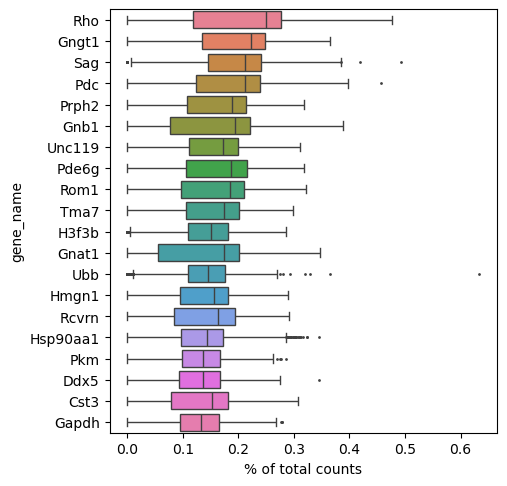

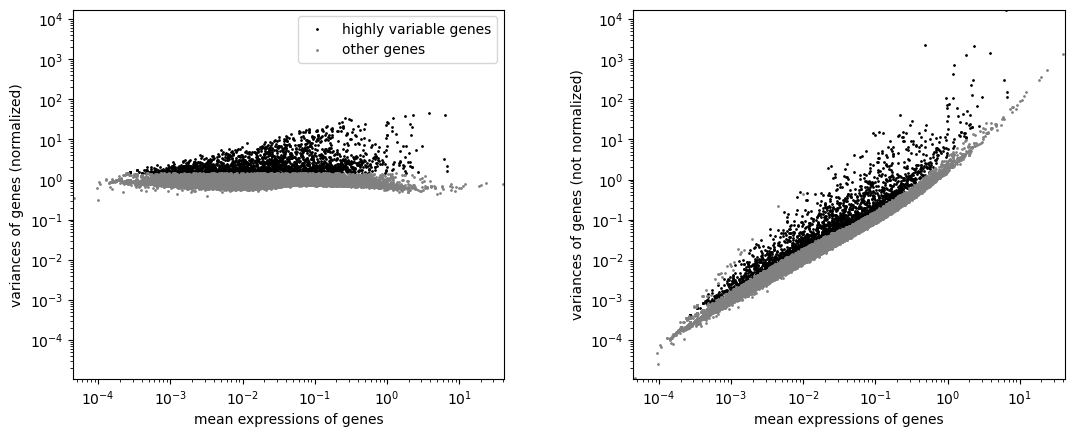

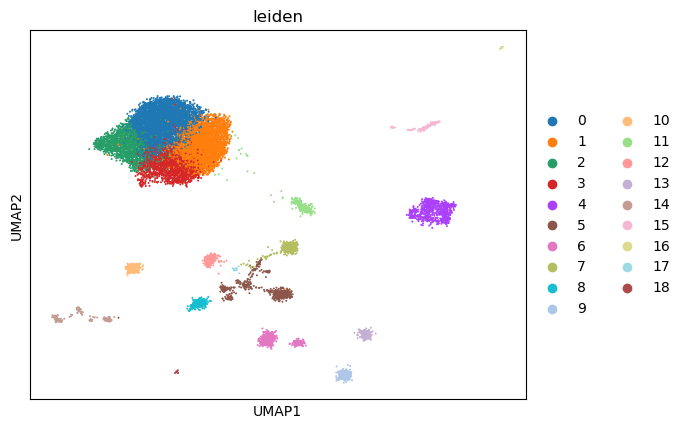

In [6]:
sc.pl.highest_expr_genes(adata, n_top=20)
sc.pl.highly_variable_genes(adata, log=True)
sc.pl.umap(adata, color="leiden")

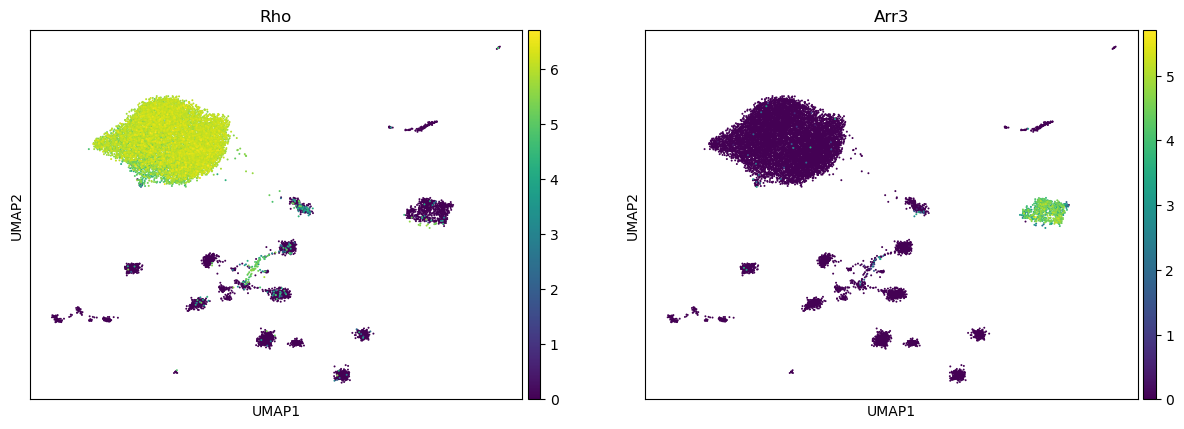

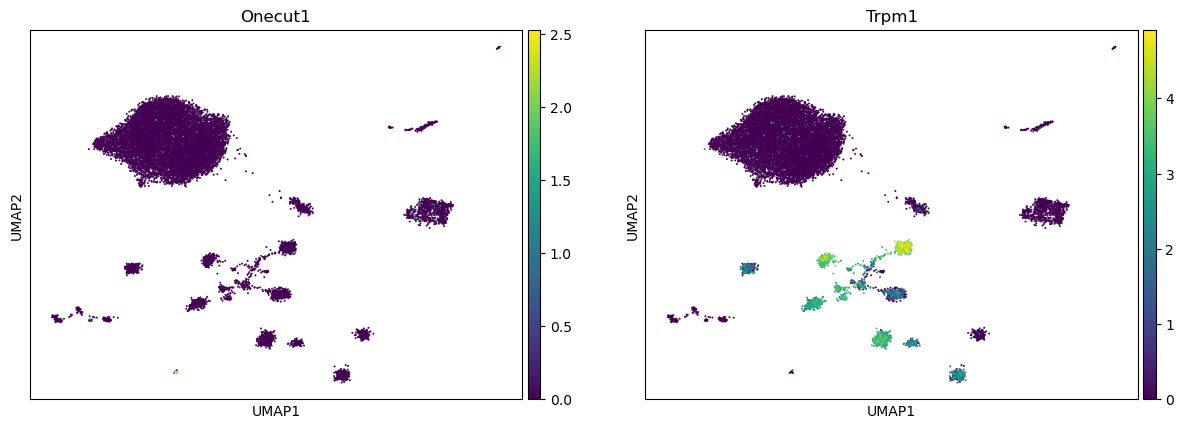

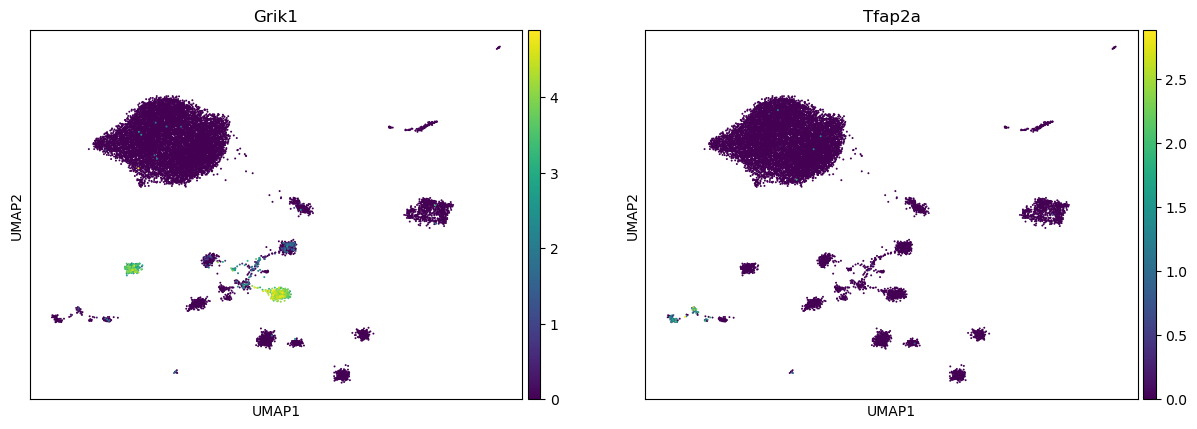

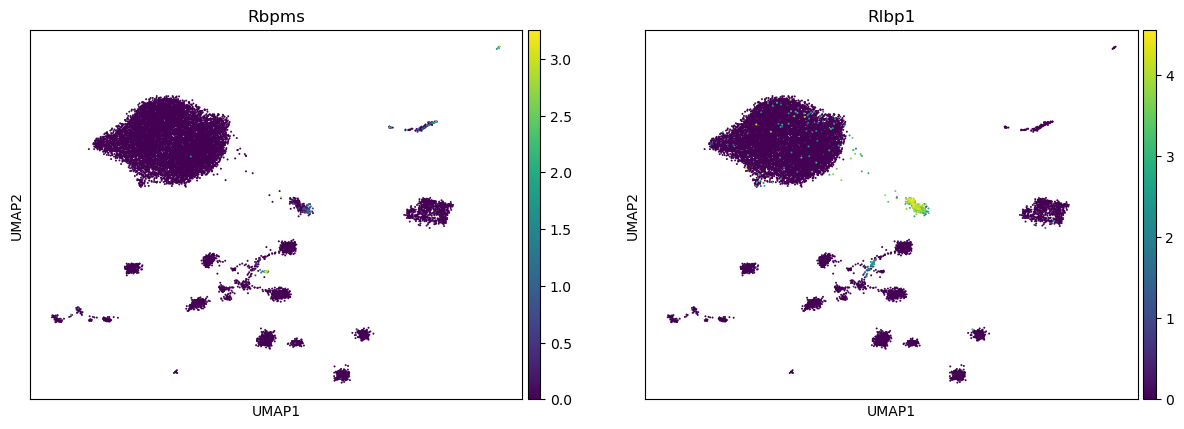

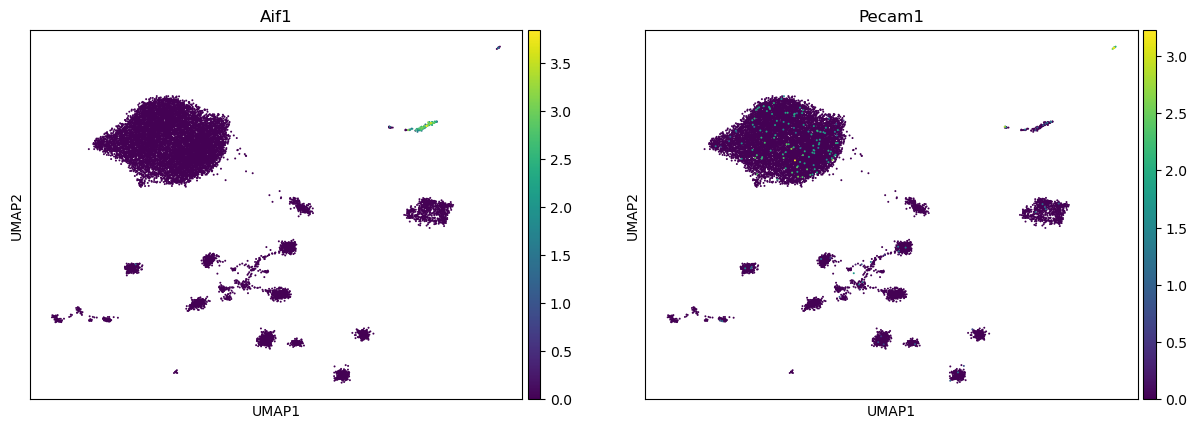

In [7]:
sc.pl.umap(adata, color=['Rho', 'Arr3'], use_raw=False)
sc.pl.umap(adata, color=['Onecut1', 'Trpm1'], use_raw=False)
sc.pl.umap(adata, color=[ 'Grik1', 'Tfap2a'], use_raw=False)
sc.pl.umap(adata, color=['Rbpms', 'Rlbp1'], use_raw=False)
sc.pl.umap(adata, color=['Aif1', 'Pecam1'], use_raw=False)

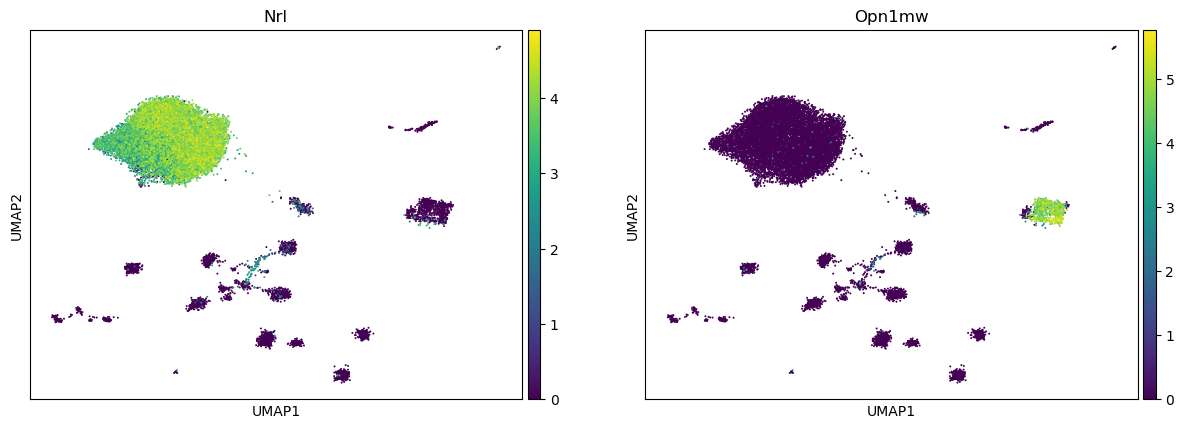

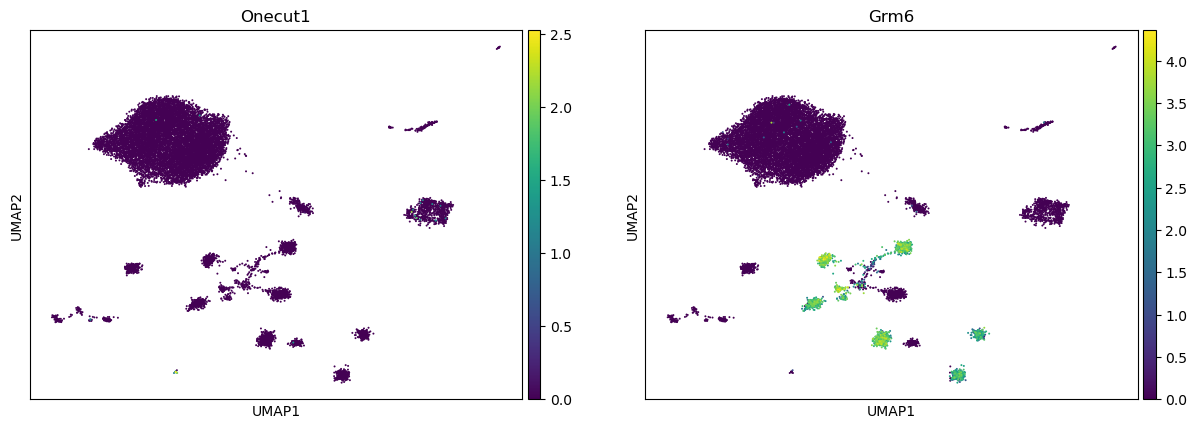

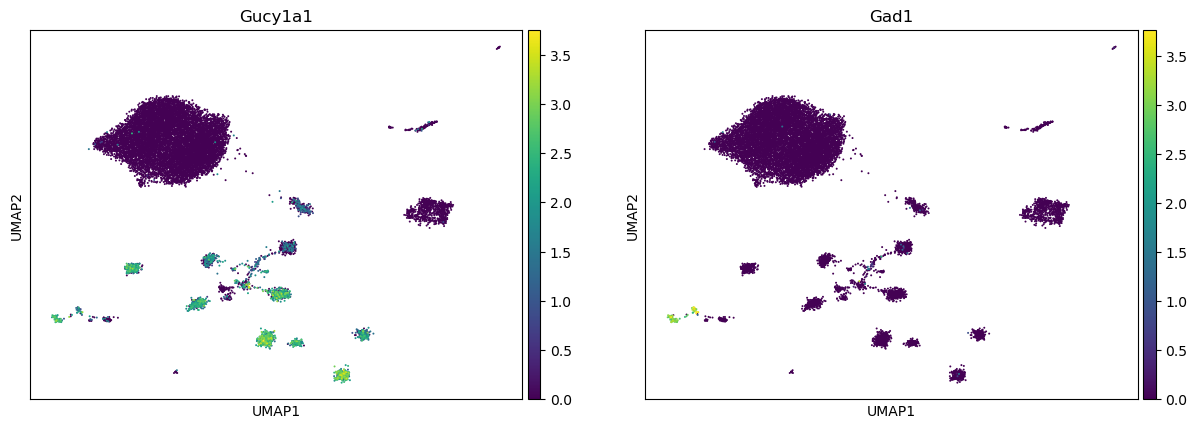

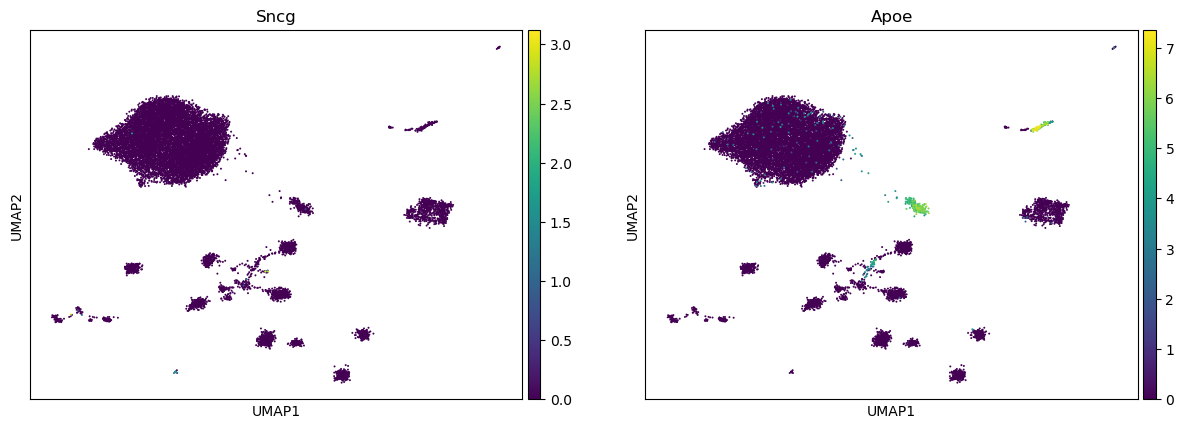

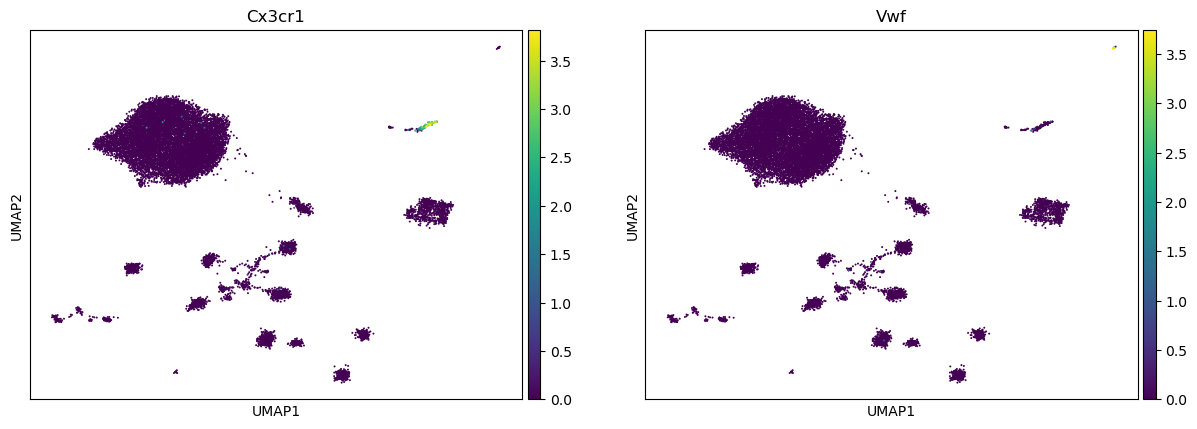

In [8]:
sc.pl.umap(adata, color=['Nrl', 'Opn1mw'], use_raw=False)
sc.pl.umap(adata, color=['Onecut1', 'Grm6'], use_raw=False)
sc.pl.umap(adata, color=['Gucy1a1', 'Gad1'], use_raw=False)
sc.pl.umap(adata, color=['Sncg', 'Apoe'], use_raw=False)
sc.pl.umap(adata, color=['Cx3cr1', 'Vwf'], use_raw=False)